In [64]:
## IMPORTS

# External modules
import pandas as pd
import matplotlib.pyplot as plt
# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, precision_score, recall_score, f1_score

In [65]:
## MODELS


def get_stats(x, y):
    stats = {}
    for variable in [x, y]:
        max_variable = round(max(variable), 2)
        min_variable = round(min(variable), 2)
        mean_variable = round(variable.mean(), 2)
        median_variable = round(variable.median(), 2)
        stats_variable = {'Max': max_variable, 'Min': min_variable, 'Mean': mean_variable, 'Median': median_variable}
        # add stats_variable to stats
        stats[variable] = stats_variable
    return stats


## GET MODELS

def get_decision_tree(X_train, y_train):
    decision_tree = DecisionTreeRegressor(random_state=42)
    decision_tree.fit(X_train, y_train)
    return decision_tree

def get_linear_regression(X_train, y_train):
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)
    return linear_regression

def get_random_forest(X_train, y_train):
    rf_model = RandomForestRegressor(random_state=1)
    rf_model.fit(X_train, y_train)
    return rf_model

def get_gradient_boosting(X_train, y_train):
    # get gradient boosting model
    gb_model = GradientBoostingRegressor(random_state=1)
    gb_model.fit(X_train, y_train)
    return gb_model

# gives a dataframe taking models as columns and score as rows
def get_all_models(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

    models = {'Linear regression': get_linear_regression(x_train, y_train),
              'Decision tree': get_decision_tree(x_train, y_train),
              'Random forest': get_random_forest(x_train, y_train),
              'Gradient boosting': get_gradient_boosting(x_train, y_train)}
    models_df = pd.DataFrame(columns=models.keys())
    for model_name, model in models.items():
        y_pred = model.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        n = len(y_test)
        p = x_test.shape[1]
        adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        mean_error = mean_absolute_error(y_test, y_pred)

        models_df.loc['score', model_name] = r2
        models_df.loc['adjusted score', model_name] = adj_r2
        models_df.loc['mean error', model_name] = mean_error

    return models_df, models

In [96]:
## CONCATENATE DATAFRAMES

paintings_keywords = ['pintura', 'painting', 'tela', 'acrílica', 'Pintura', 'Painting', 'Canvas', 'Acrílica']

# ART RIO
artrio = pd.read_csv('../temporary-files/artrio_artworks_info.csv')
artrio['Platform'] = 'ArtRio'
artrio.rename(columns={'Price / cm2': 'Price / cm²'}, inplace=True)
artrio.fillna('', inplace=True)
artrio = artrio[artrio['Ficha técnica'].str.contains('|'.join(paintings_keywords))].reset_index(drop=True)

# ART SOUL
artsoul = pd.read_csv('../temporary-files/artsoul_artworks_info.csv')
artsoul['Platform'] = 'Artsoul'
artsoul.rename(columns={'Size': 'Area'}, inplace=True)
artsoul.fillna('', inplace=True)
columns = ['Description', 'Techniques']
# filter rows that contain paintings keywords in one of the columns
# artsoul = artsoul[(artsoul['Description'].str.contains('|'.join(paintings_keywords))) | (artsoul['Techniques'].str.contains('|'.join(paintings_keywords)))].reset_index(drop=True)

# SP ARTE
sparte = pd.read_csv('../temporary-files/sparte_artworks_info.csv')
sparte['Platform'] = 'SP-Arte'
sparte.rename(columns={'Size': 'Area'}, inplace=True)
sparte = sparte[sparte['Description'].str.contains('|'.join(paintings_keywords))].reset_index(drop=True)

# Concatenate the dataframes
artworks_info = pd.concat([artrio, artsoul, sparte], ignore_index=True)
columns = ['Title', 'Artist', 'Price', 'Area', 'Price / cm²', 'Gallery', 'Platform']
artworks_info = artworks_info[columns]

artworks_info['Platform'].describe()

count        1396
unique          3
top       SP-Arte
freq          805
Name: Platform, dtype: object

In [90]:
# remove 0.05 and 0.95 quantiles of price / cm²
artworks_info = artworks_info[(artworks_info['Price / cm²'] > artworks_info['Price / cm²'].quantile(0.05)) &
                                (artworks_info['Price / cm²'] < artworks_info['Price / cm²'].quantile(0.95))]

count        254
unique         1
top       ArtRio
freq         254
Name: Platform, dtype: object

In [94]:
# for each platform, get mean price
platforms = artworks_info['Platform'].unique()
platforms_analysis = {}
for platform in platforms:
    platforms_analysis['MeanPrice'] = artworks_info[artworks_info['Platform'] == platform]['Price'].mean()
    platforms_analysis['MedianPrice'] = artworks_info[artworks_info['Platform'] == platform]['Price'].median()
    platforms_analysis['MeanPricePerArea'] = artworks_info[artworks_info['Platform'] == platform]['Price / cm²'].mean()
    platforms_analysis['MedianPricePerArea'] = artworks_info[artworks_info['Platform'] == platform]['Price / cm²'].median()

platforms_analysis

{'MeanPrice': 17992.889763779527,
 'MedianPrice': 8100.0,
 'MeanPricePerArea': 5.259267963107187,
 'MedianPricePerArea': 3.7321428571428568}

Text(0.5, 1.0, 'Preço x Área')

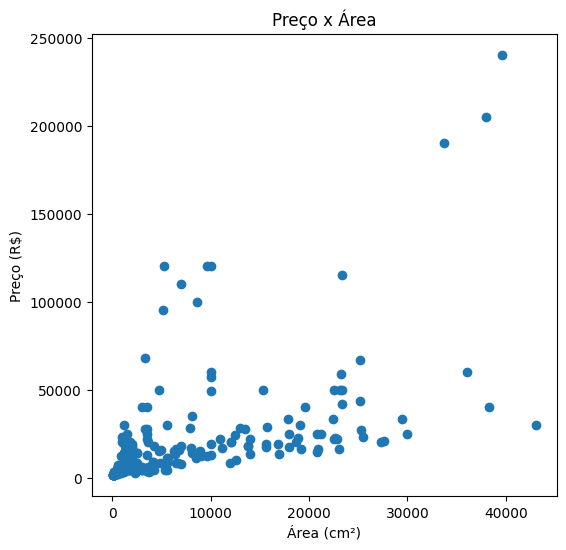

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(artworks_info['Area'], artworks_info['Price'])
plt.xlabel('Área (cm²)')
plt.ylabel('Preço (R$)')
plt.title('Preço x Área')

Text(0.5, 0, 'Área (cm²)')

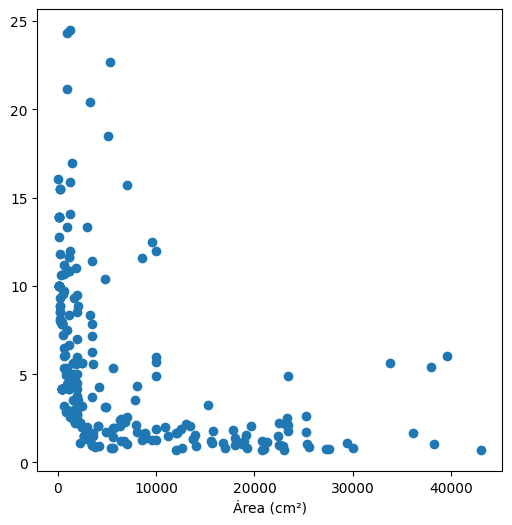